# BBS 87/2

* [Verteilung der Funde](#Verteilung-der-Funde)
    * [Fundkategorien](#Fundkategorien)
    * [Keramische Stilgruppen](#Keramische-Stilgruppen)
    * [Fragmentierung der Keramik](#Fragmentierung-der-Keramik)
* [Formen](#Formen)
    * [Gefäßformen](#Gefäßformen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

### Fundkategorien

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/2'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Anzahl,Gr_Clist,Art,Tiefe
0,BBS,87/2,-5:4,BBS,58,1,120,K,90
1,BBS,87/2,"-5:6,17",BBS,32,1,70,K,90
2,BBS,87/2,-5:3,BBS,27,1,70,K,90
3,BBS,87/2,-4,,278,1,200,Eisen,60
4,BBS,87/2,-4:5,,NaN,NaN,,Sonder,60


In [3]:
# da es in BBS 87/2 keine Funde aus den Abträgen 1 + 2 gab, müssen Dummy-Werte manuell eingefügt werden:
# Tiefen 20 & 40 einfügen - bissle kompliziert so, aber funktioniert
df = df.set_value(len(df), 'Tiefe', '20')
df = df.set_value(len(df)-1, 'Gewicht', .0)
df = df.set_value(len(df)-1, 'Art', 'K')
df = df.set_value(len(df), 'Tiefe', '40')
df = df.set_value(len(df)-1, 'Gewicht', .0)
df = df.set_value(len(df)-1, 'Art', 'K')

In [4]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = np.sum)
df_pivot

Art,Eisen,HL,K,Sonder,Stein
Tiefe,,,,,
0,NaN,NaN,93,NaN,86
20,NaN,NaN,0,NaN,NaN
40,NaN,NaN,0,NaN,NaN
50,NaN,10,13,NaN,NaN
60,280,NaN,39,NaN,NaN
90,NaN,135,572,NaN,15


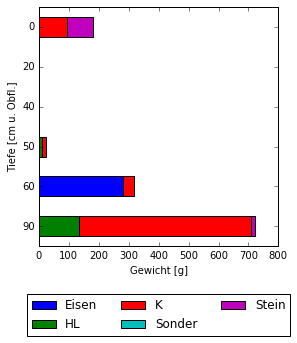

In [6]:
ax = df_pivot.plot(kind = 'barh', stacked=True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=3, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-7_BBS87-2_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **BBS 87/2** Fundverteilung

In [11]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-07_BBS87-2_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Eisen,2,1.8,0.28,22.5
1,gebrannter Lehm,10,9.2,0.14,11.7
2,Keramik,95,87.2,0.72,57.7
3,Sonder,0,0.0,0.00,0.0
4,Stein,2,1.8,0.10,8.1


## Keramische Stilgruppen

In [7]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/2')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,BBS,87/2,-5:4,BBS,58,120,K,90
1,BBS,87/2,"-5:6,17",BBS,32,70,K,90
2,BBS,87/2,-5:3,BBS,27,70,K,90
3,BBS,87/2,1,BBS,12,70,K,0
4,BBS,87/2,2,BBS (?),6,30,K,0


Leerstellen mit (?) ersetzen:

In [8]:
df['Typ'] = df['Typ'].replace('','(?)')

In [9]:
# da es in BBS 87/2 keine Funde aus den Abträgen 1 + 2 gab, müssen Dummy-Werte manuell eingefügt werden:
df = df.set_value(len(df), 'Tiefe', '20')
df = df.set_value(len(df)-1, 'Gewicht', .0)
df = df.set_value(len(df)-1, 'Typ', '(?)')
df = df.set_value(len(df), 'Tiefe', '40')
df = df.set_value(len(df)-1, 'Gewicht', .0)
df = df.set_value(len(df)-1, 'Typ', '(?)')

In [10]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum)
df_pivot

Typ,(?),BBS,BBS (?),BOT (?)
Tiefe,,,,
0,19,24,12,NaN
20,0,NaN,NaN,NaN
40,0,NaN,NaN,NaN
50,3,8,NaN,NaN
60,NaN,22,NaN,17
90,3,156,261,123


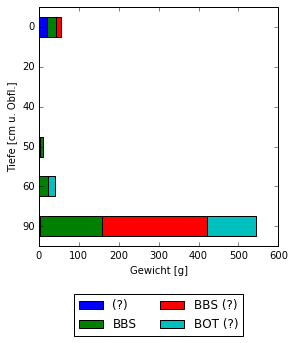

In [12]:
ax = df_pivot.plot(kind = 'barh', stacked=True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-7_BBS87-2_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **BBS 87/2** keramische Stilgruppen

## Fragmentierung der Keramik

In [13]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Gr_Clist, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/2')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')
df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Gr_Clist,Art
0,BBS,87/2,-5:4,120,K
1,BBS,87/2,"-5:6,17",70,K
2,BBS,87/2,-5:3,70,K
3,BBS,87/2,1,70,K
4,BBS,87/2,2,30,K


In [14]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'Gr_Clist', aggfunc = len)
df_pivot

Gr_Clist
30     23
70     18
120     1
Name: ort_kurz, dtype: int64

In [15]:
# da es in BBS 87/1 keine Keramik größer als 70 gab, müssen Dummy-Werte manuell eingefügt werden:
df_pivot[200] = 0.
df_pivot['>200'] = 0.
df_pivot

Gr_Clist
30      23
70      18
120      1
200      0
>200     0
Name: ort_kurz, dtype: float64

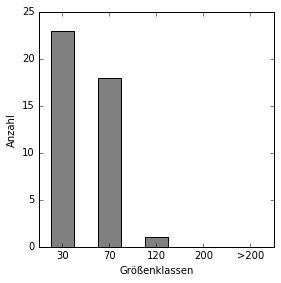

In [16]:
ax = df_pivot.plot(kind = 'bar', color = 'Gray')
plt.xticks(rotation=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.tight_layout()
plt.savefig('../output/figs/9-7_BBS87-2_KeramikFragmentierung.pdf', bbox_inches='tight')
plt.show()

> **BBS 87/2** Fragmentierungsgrad

## Formen

### Randformen

In [15]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Form_Rand, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/2')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Form_Rand) <> ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Form_Rand,Art
0,BBS,87/2,-5:4,BBS,R92 HPW,K
1,BBS,87/2,-5:3,BBS,R10a (?),K
2,BBS,87/2,1,BBS,B1/B3,K
3,BBS,87/2,2,BBS (?),B1,K
4,BBS,87/2,3,BBS,B1,K


In [16]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'Form_Rand', aggfunc = len)
df_pivot

Form_Rand
A1              1
A1/C1 (?)       1
B1              8
B1/B3           1
B2              3
B2/sehr kurz    1
B3              2
C1/kurz         3
R10a (?)        1
R12a            1
R92 HPW         1
Name: ort_kurz, dtype: int64

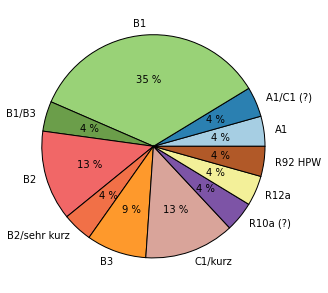

In [17]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.savefig('../output/figs/9-7_BBS87-2_KeramikRandformen.pdf', bbox_inches='tight')

> **BBS 87/2** Randformen

## Verzierungselemente

In [18]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'BBS')
            AND ((t_Komplex.bef_nr) = '87/2')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [19]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,V01a,V07
pos,,
1 Innen,4,1
2 Rand,7,0
4 Hals,4,0


In [20]:
df_pivot = df_pivot.sort_index(ascending=True)

In [21]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

In [22]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-7_BBS87-2_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **BBS 87/2** Verzierungselemente

n

In [23]:
df['objID'].nunique()

10